# Phase2- Data analysis and preprocessing of (pet_adoption dataset)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import SelectKBest , f_classif
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2 ,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("dataset.csv")

# Raw dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [5]:
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [6]:
df1=pd.DataFrame(df)
print(df1)

      PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0       500    Bird          Parakeet        131  Orange   Large   5.039768   
1       501  Rabbit            Rabbit         73   White   Large  16.086727   
2       502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3       503    Bird          Parakeet         97   White   Small   3.339423   
4       504  Rabbit            Rabbit        123    Gray   Large  20.498100   
...     ...     ...               ...        ...     ...     ...        ...   
2002   2502     Dog            Poodle         72  Orange   Small  27.039045   
2003   2503  Rabbit            Rabbit        124   Brown   Small   4.726954   
2004   2504  Rabbit            Rabbit        113  Orange   Small   1.758592   
2005   2505     Dog          Labrador         12    Gray   Large  20.961592   
2006   2506  Rabbit            Rabbit        126   White  Medium  18.519788   

      Vaccinated  HealthCondition  TimeInShelterDay

# Statistical summaries

removing first column "PetID" from dataframe to maintain clarity and relevance in our visual representations , feature selection, model building..etc , making it more efficient for analysis and modeling.

In [10]:
x=list(df.keys())[1:]
df2=df[x]

Central tendency measurements

In [11]:
df2.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


The data shows a range of values for each attribute, indicating a diverse set of animals in the dataset. For example, the age of the animals ranges from 1 month to 179 months, and the weight varies from around 1 kg to nearly 30 kg.

The table provides summary statistics such as the count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum value for each attribute. This information can be useful for understanding the characteristics of the animals available for adoption and identifying any patterns or trends in the data.

**Variance**

In [12]:
var_data = df ["AgeMonths"].var ()
print ("AgeMonths veriance = ",var_data)

AgeMonths veriance =  2719.4517389535395


In [13]:
var_data = df ["WeightKg"].var ()
print ("WeightKg veriance = ",var_data)

WeightKg veriance =  69.35140643666254


In [14]:
var_data = df ["Vaccinated"].var ()
print ("Vaccinatedvar veriancer =",  var_data)

Vaccinatedvar veriancer = 0.20968484680487


In [15]:
var_data = df ["HealthCondition"].var ()
print ("HealthCondition veriance= " ,var_data)

HealthCondition veriance=  0.15785279934982935


In [16]:
var_data = df ["TimeInShelterDays"].var ()
print ("TimeInShelterDays veriance=",var_data)

TimeInShelterDays veriance= 662.5606444244752


In [17]:
var_data = df ["AdoptionFee"].var ()
print ("AdoptionFee veriance = ",var_data)

AdoptionFee veriance =  20416.706146135595


In [18]:
var_data = df ["PreviousOwner"].var ()
print ("PreviousOwner veriance = ",var_data)

PreviousOwner veriance =  0.21087857503722912


In [19]:
var_data = df ["AdoptionLikelihood"].var ()
print ("AdoptionLikelihood veriance = ",var_data)

AdoptionLikelihood veriance =  0.22064648108489274


The output calculates the variance for various attributes related to animal adoptions, providing insights into their variability:
 1. AgeMonths Variance: 2719.45 ,  This indicates a significant range of animal ages, highlighting a diverse population.
 2. WeightKg Variance: 69.35
 , A high variance in weights suggests considerable diversity in the size and physical characteristics of the animals.
 3. Vaccinated Variance: 0.2097 , The low variance indicates that most animals are vaccinated, a reassuring factor for potential adopters concerned about health
 4. HealthCondition Variance: 0.1579
   ,  This shows a moderate level of variation in the health conditions of the animals.
 5. TimeInShelterDays Variance: 662.561
 ,   This indicates a large variation in how long animals stay in the shelter before adoption.
 6. AdoptionFee Variance: 20416.706  , There’s a significant difference in
adoption fees, likely influenced by factors like health, age, and shelter duration.
 7. PreviousOwner Variance: 0.2109 ,  This reflects some variability in the h istory of animals having prior owners.
 8. AdoptionLikelihood Variance: 0.2206  ,      A moderate variation in how likely the animals are to be adopted.

**Conclusion:**
These variances highlight the diversity in the animal population, as well as the various factors that influence adoption outcomes and processes.

# Graphs and tables
To effectively visualize and understand the distribution of variables in our dataset, we used a combination of graphs and tables.

**1-Histogram of AgeMonths:**

The histogram displays the ages of pets available for adoption. A large number of pets in a certain age range indicates that age group is more prevalent in the shelter. We observed that most values fall approximately between 140 and 175 months.

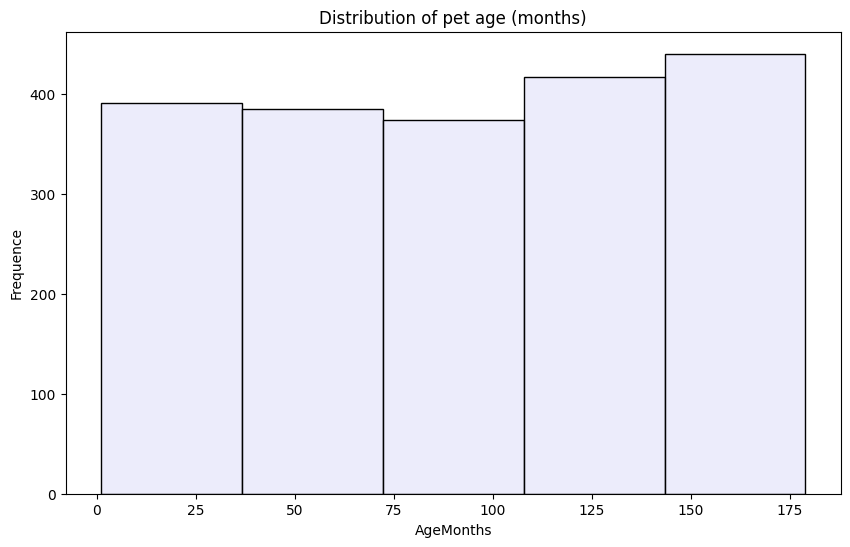

In [20]:
#Histogram of AgeMonths
plt.figure(figsize=(10,6))
sns.histplot(df1['AgeMonths'],bins=5,edgecolor='black',color='lavender')
plt.title('Distribution of pet age (months)')
plt.xlabel('AgeMonths')
plt.ylabel('Frequence')
plt.show()

**2-Bar plot for Adoption Likelihood (classlabel)**

Our bar plot displays the distribution of adoption likelihood among the pets in our dataset. This chart categorizes pets into two groups: those likely to be adopted, represented as "1," and those unlikely to be adopted, represented as "0.". From the plot, we can conclude that the data is **imbalanced**,the results reveal a significant disparity between these two categories. A higher count in the "unlikely Adopted"(almost 1400) compared to the "Yes" class (around 600).

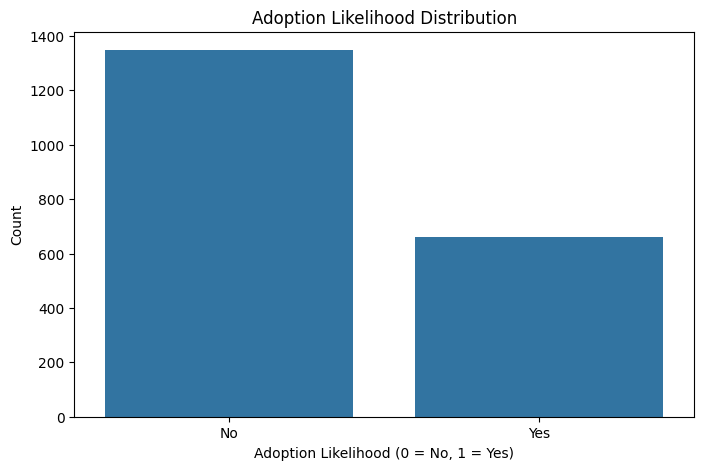

In [21]:
# Bar plot for Adoption Likelihood
adoption_counts = df1['AdoptionLikelihood'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=adoption_counts.index, y=adoption_counts.values)
plt.title('Adoption Likelihood Distribution')
plt.xlabel('Adoption Likelihood (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

**3-pie chart of random sample petType**

visually represents the frequency distribution of different pet types within the random sample of 50 rows, by highlighting which pet types are more common. it shows that the bird and rabbit are less represented in the sample, while cat and dog  are the most common pet type in this dataset sample.

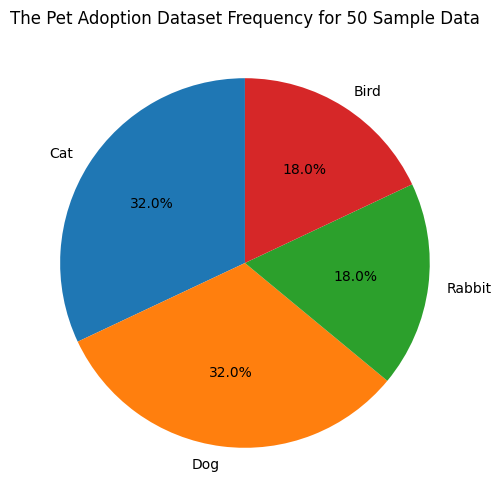

In [22]:
# Take a random sample of 50 rows
data_sample = df.sample(n=50, random_state=1)

# Calculate the frequency of each Pet Type in the sample
PetType_frequency = data_sample['PetType'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
PetType_frequency.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('The Pet Adoption Dataset Frequency for 50 Sample Data')
plt.ylabel('')
plt.show()

**4-Bar plot for petType**

A bar plot allows us to quickly see which size category has the most pets and which has the least. We notice that the ‘Medium’ bar is significantly longer than the others, indicating that there are more medium pets in the dataset compared to small or large pets.

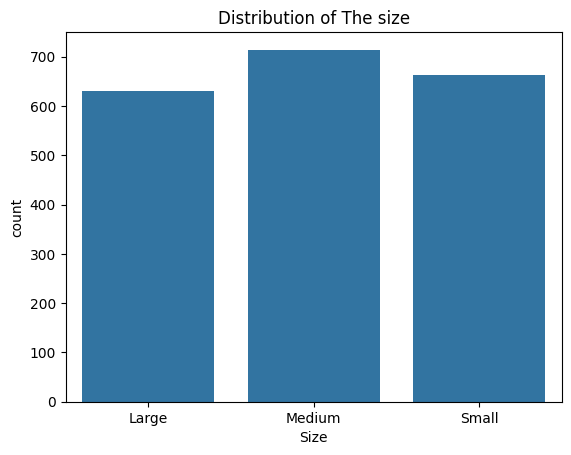

In [23]:
# Bar chart
sns.countplot(x='Size', data=df)
plt.title('Distribution of The size')
plt.show()

**5-Scatter plot**

 displays individual pets, with each point representing a pet plotted based on its weight and age. Different colors are used to distinguish pet types, allowing for easy comparison of how various species (e.g., dogs, cats, birds) are distributed by weight and age. By analyzing the plot, you may identify trends, such as whether certain types of pets tend to be heavier or lighter at specific ages, providing useful insights into pet characteristics within the dataset.

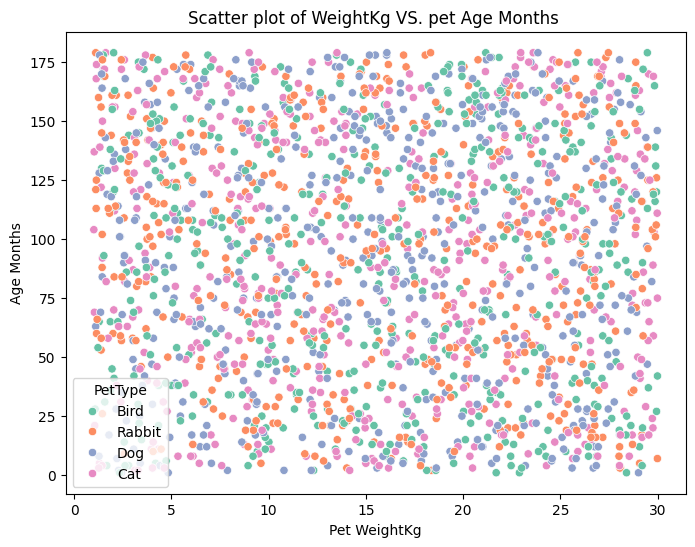

In [24]:
# SCATTER PLOT:
#pet_sample = df1.sample(n=50 , random_state=1 )
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'WeightKg' , y='AgeMonths' , data = df  , hue='PetType' , palette='Set2' )
plt.title('Scatter plot of WeightKg VS. pet Age Months ')
plt.xlabel('Pet WeightKg')
plt.ylabel('Age Months')
plt.show()

# Data Cleaning

**1-Missing values:**

refer to data points that are absent from the dataset

In [25]:
# MISSING VALUE
print ("Missing value")
print(df1.isna().sum())

Missing value
PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


**2-duplicate rows:**

occur when the same record appears multiple times in the dataset, it may occur because errors in data collection or merging processes.

In [26]:
# duplicate Rows
duplicates = df1.duplicated()
print("Duplicate Rows (True indicates a duplicate):")
print(duplicates)

Duplicate Rows (True indicates a duplicate):
0       False
1       False
2       False
3       False
4       False
        ...  
2002    False
2003    False
2004    False
2005    False
2006    False
Length: 2007, dtype: bool


**3-Outliers**

refer to the data objects that doesn't comply with the behaviour or pattern  of the rest of the objects

In [27]:
# Calculate Z-scores for a AgeMonths column
age_array = df1['AgeMonths'].to_numpy()
z_score = zscore(age_array)
threshold = 2

outliers = [age_array[i] for i, z in enumerate(z_score) if abs(z) > threshold]
print("Outliers using Z-Score in AgeMonths column:")
print(outliers)

# Calculate Z-scores for a AdoptionFee column
AdoptionFee_array = df1['AdoptionFee'].to_numpy()
z_score = zscore(AdoptionFee_array)
threshold = 2

outliers = [AdoptionFee_array[i] for i, z in enumerate(z_score) if abs(z) > threshold]
print("Outliers using Z-Score in AdoptionFee column:")
print(outliers)

# Calculate Z-scores for a TimeInShelterDays column
TimeInShelterDays_array = df1['TimeInShelterDays'].to_numpy()
z_score = zscore(TimeInShelterDays_array)
threshold = 2

outliers = [TimeInShelterDays_array[i] for i, z in enumerate(z_score) if abs(z) > threshold]
print("Outliers using Z-Score in TimeInShelterDays column:")
print(outliers)

# Calculate Z-scores for a WeightKg column
WeightKg_array = df1['WeightKg'].to_numpy()
z_score = zscore(WeightKg_array)
threshold = 2

outliers = [WeightKg_array[i] for i, z in enumerate(z_score) if abs(z) > threshold]
print("Outliers using Z-Score in WeightKg column:")
print(outliers)

Outliers using Z-Score in AgeMonths column:
[]
Outliers using Z-Score in AdoptionFee column:
[]
Outliers using Z-Score in TimeInShelterDays column:
[]
Outliers using Z-Score in WeightKg column:
[]


# Conclusion

In summary, since there is no missing values, outliers, or duplicates in our dataset, the cleanliness of our dataset enhances the quality of analysis. so we can start proceed to data preprocessing techniques.

# Correlation Analysis

using chi square (Nominal attribute)

the correlation matrix helps identify relationships between variables,  to make informed decisions about which features to select based on their correlation with the target variable.

In [28]:
# Sample DataFrame
data = {
    'AgeMonths': [2, 8, 15, 30, 150],
    'TimeInShelterDays': [5, 15, 35, 70, 85],
    'AdoptionStatus': [1, 0, 1, 0, 1]  # Target variable (1 for adopted, 0 for not adopted)
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Set a threshold for the correlation
threshold = 0.3  # Example threshold

# Features correlated with the target variable
correlation_with_target = correlation_matrix['AdoptionStatus']
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold]

# Display relevant features
print("\nRelevant Features based on correlation with AdoptionStatus:\n", relevant_features)

Correlation Matrix:
                    AgeMonths  TimeInShelterDays  AdoptionStatus
AgeMonths           1.000000           0.806575        0.324853
TimeInShelterDays   0.806575           1.000000       -0.013204
AdoptionStatus      0.324853          -0.013204        1.000000

Relevant Features based on correlation with AdoptionStatus:
 AgeMonths         0.324853
AdoptionStatus    1.000000
Name: AdoptionStatus, dtype: float64


# Transformation (Preproccessing)

**1-Normalization:**

Scaling the data to a specific range, often [0, 1].

In [29]:
# NORMALIZATION
column_to_normilaize=[ 'WeightKg','AdoptionFee' ]
data_to_normalize = df1[column_to_normilaize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

df1[column_to_normilaize] = normalized_data_minmax

print("Min-Max scaled data")
print(df1)

Min-Max scaled data
      PetID PetType             Breed  AgeMonths   Color    Size  WeightKg  \
0       500    Bird          Parakeet        131  Orange   Large  0.138783   
1       501  Rabbit            Rabbit         73   White   Large  0.520009   
2       502     Dog  Golden Retriever        136  Orange  Medium  0.036514   
3       503    Bird          Parakeet         97   White   Small  0.080105   
4       504  Rabbit            Rabbit        123    Gray   Large  0.672244   
...     ...     ...               ...        ...     ...     ...       ...   
2002   2502     Dog            Poodle         72  Orange   Small  0.897969   
2003   2503  Rabbit            Rabbit        124   Brown   Small  0.127988   
2004   2504  Rabbit            Rabbit        113  Orange   Small  0.025551   
2005   2505     Dog          Labrador         12    Gray   Large  0.688239   
2006   2506  Rabbit            Rabbit        126   White  Medium  0.603973   

      Vaccinated  HealthCondition  TimeInSh

By normalizing WeightKg and AdoptionFee, we ensure that  different features can be compared .

**2-Discretization**

converting continuous numerical values into discrete categories or bins.

In [30]:
# DISCRETIZATION

# For AgeMonths
column_to_discretize = ['AgeMonths', 'TimeInShelterDays']
age_bins = [0, 6, 12, 24, 60, 120, 180]
age_labels = ['1-6 months', '7-12 months', '13-24 months', '25-60 months', '61-120 months', '121-180 months']
df1['AgeMonths'] = pd.cut(df1['AgeMonths'], bins=age_bins, labels=age_labels, right=True)

# For TimeInShelterDays
shelter_bins = [0, 10, 30, 60, 90]
shelter_labels = ['Very Short Stay', 'Short Stay', 'Medium Stay', 'Long Stay']
df1['TimeInShelterDays'] = pd.cut(df1['TimeInShelterDays'], bins=shelter_bins, labels=shelter_labels, right=False)

# Display the updated DataFrame
print(df1[['AgeMonths', 'TimeInShelterDays']])


           AgeMonths TimeInShelterDays
0     121-180 months        Short Stay
1      61-120 months   Very Short Stay
2     121-180 months         Long Stay
3      61-120 months         Long Stay
4     121-180 months        Short Stay
...              ...               ...
2002   61-120 months         Long Stay
2003  121-180 months       Medium Stay
2004   61-120 months         Long Stay
2005     7-12 months       Medium Stay
2006  121-180 months        Short Stay

[2007 rows x 2 columns]


 discretizing these variables helps to categorize pets into age groups and shelter duration ranges. This is beneficial for improving model performance by reducing the complexity of inputs, which can help algorithms find patterns more efficiently.

**3-Encoding**

transforms categorical variables into a numerical format

In [31]:
#TRANSFORMATION(ENCODING)
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy import stats


le = LabelEncoder()
df1['PetType']=le.fit_transform(df1['PetType'])
df1['Size']=le.fit_transform(df1['Size'])
df1['Breed']=le.fit_transform(df1['Breed'])

print(df1)

      PetID  PetType  Breed       AgeMonths   Color  Size  WeightKg  \
0       500        0      2  121-180 months  Orange     0  0.138783   
1       501        3      5   61-120 months   White     0  0.520009   
2       502        2      0  121-180 months  Orange     1  0.036514   
3       503        0      2   61-120 months   White     2  0.080105   
4       504        3      5  121-180 months    Gray     0  0.672244   
...     ...      ...    ...             ...     ...   ...       ...   
2002   2502        2      4   61-120 months  Orange     2  0.897969   
2003   2503        3      5  121-180 months   Brown     2  0.127988   
2004   2504        3      5   61-120 months  Orange     2  0.025551   
2005   2505        2      1     7-12 months    Gray     0  0.688239   
2006   2506        3      5  121-180 months   White     1  0.603973   

      Vaccinated  HealthCondition TimeInShelterDays  AdoptionFee  \
0              1                0        Short Stay     0.280561   
1          

**PetType**: types like "Dog," "Cat," etc. Encoding allows the model to understand these categories as distinct groups.

**Size**: Similarly, sizes like "Small," "Medium," and "Large" are converted into numerical values, enabling the model to analyze their impact on adoption likelihood.

**Breed**: With  many different breeds, encoding helps represent this information numerically.

# Feature selection

**1-Filter FS Method using univarince method**

How It Works: Evaluates features independently using statistical tests.

**Conclusion:**  filter method successfully identified four important features that significantly contribute to the model's predictive performance, achieving an accuracy of 83%. This method is good for initial feature selection but does not consider feature interactions.

In [32]:
#using univarince model
X = df2.drop(columns=['AdoptionLikelihood'])
y = df2['AdoptionLikelihood']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
#70% of the data is used for training , 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Univariate Feature Selection
selector = SelectKBest(score_func=chi2, k=4)  # Select top 4 features based on their relationship with the target variable, using the Chi-squared statistical test.
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Transform the test set

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

# Fit a model using the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Calculate accuracy
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with selected features:", accuracy)


Selected Features:
Index(['AgeMonths', 'HealthCondition', 'Breed_Labrador', 'Size_Medium'], dtype='object')
Accuracy of the model with selected features: 0.8275290215588723


**2-Wrapper method ( recursive feature elimination)**

How It Works: Trains a model, removes least important features iteratively.

**Conclusion:** it select the same selected features as the filter method but achieved a higher accuracy of 89%. This indicates that RFE is effective in identifying the most relevant features while considering their interactions.

In [33]:
X = df2.drop(columns=['AdoptionLikelihood'])
y = df2['AdoptionLikelihood']
X = pd.get_dummies(X, drop_first=True) #converted to a numerical format using one-hot encoding, which is necessary for the model.

# Split the data into training and testing sets
#70% of the data is used for training , 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42) #allows the model more iterations to find the best solution if needed. for random state its the most papular used


num_features_to_select = 4 # select 4 top feature , It fits the model to the training data and starts eliminating less important features.

# Initialize RFE for feature selection
selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
selector.fit(X_train, y_train)

# Transform the data for selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Evaluate accuracy

y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print selected features and their ranking
print("Selected Features:", selected_features.tolist())

Accuracy: 0.89
Selected Features: ['AgeMonths', 'HealthCondition', 'Breed_Labrador', 'Size_Medium']


**3-Embedded FS Method L1 Regularization.**

How It Works: Combines feature selection with model training (e.g., Lasso).

**Conclusion:** The embedded method selected a slightly different set of features, including Vaccinated instead of AgeMonths. It achieved an accuracy of 86%, demonstrating that L1 regularization can effectively identify important features while maintaining strong predictive performance.

In [34]:
# Convert categorical variables to numerical to helps the model understand the data
df2 = pd.get_dummies(df2, drop_first=True)

# Define features and target variable
x = df2.drop(columns=['AdoptionLikelihood'])
y = df2['AdoptionLikelihood']

# Split the data into training and testing sets
#70% of the data is used for training , 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features for equal weight
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the Lasso model
model = Lasso(alpha=0.1)
model.fit(x_train_scaled, y_train)

# identifies which features were selected based on their coefficients
#Features with non-zero coefficients are considered important for the model.
selected_features = x.columns[model.coef_ != 0]
print("Selected Features:", selected_features)

# Make predictions to calculate the accuracy
y_pred = model.predict(x_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy with selected features:", accuracy)


Selected Features: Index(['Vaccinated', 'HealthCondition', 'Breed_Labrador', 'Size_Medium'], dtype='object')
Accuracy with selected features: 0.857379767827529


# **Conclusion:**


all approaches identified relevant features that contribute to the predictive ability of the model.
Best Method: Wrapper Method (RFE) Reason for Choice:

1-Highest Accuracy: The Wrapper Method achieved the highest accuracy of 0.89, indicating its effectiveness in capturing feature interactions and that it made the best predictions among the three methods.

2-Selected Features Consistency: It selected features that were also chosen by the Embedded Method which shows the ability to perform feature selection during model training. (like HealthCondition, Breed_Labrador, and Size_Medium), showing that it is likely capturing important information effectively.

making it the preferred choice for this dataset.

and we can see that ['Vaccinated', 'HealthCondition', 'Breed_Labrador', 'Size_Medium'] provide clear insights into what influences pet adoption, helping guide strategies for increasing adoption rates.



# contingency_table

In [35]:
#contingency_table

contingency_table = pd.crosstab(df1['PetType'], df1['Breed'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistics:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Set alpha level
alpha = 0.05
print("\nAlpha Level:", alpha)

# Check if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between PetType and Breed.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between PetType and Breed.")


Contingency Table:
Breed      0    1    2    3    4    5    6
PetType                                   
0          0    0  487    0    0    0    0
1          0    0    0  252    0    0  253
2        162  193    0    0  167    0    0
3          0    0    0    0    0  493    0

Chi-Square Statistics: 6021.0
Degrees of Freedom: 18
Expected Frequencies:
[[ 39.30941704  46.83158944 118.17090184  61.14798206  40.52267065
  119.62680618  61.39063279]
 [ 40.76233184  48.56253114 122.53861485  63.40807175  42.0204285
  124.04833084  63.65969108]
 [ 42.13452915  50.19730942 126.66367713  65.5426009   43.43497758
  128.22421525  65.80269058]
 [ 39.79372197  47.40857    119.62680618  61.90134529  41.02192327
  121.10064773  62.14698555]]

Alpha Level: 0.05
Reject the null hypothesis: There is a significant association between PetType and Breed.


During our correlation analysis,given the significant Chi-Square statistic, we observed a significant relationship between the variables PetType and Breed.and since every pet have one breed only unless the Dog and the Cat breeds have the aproximistly the same number. We decided to select only one of these correlated variables to reduce redundancy in our dataset and simplify our model, we will select the more relevant variable for our analysis"PetType".



**Removing 'Breed' column**

In [36]:
print("Before dropping 'Breed' column:")
print(df1.head())

# Drop the 'Breed' column
df1.drop(columns=['Breed'], inplace=True)

# Display the first few rows of the dataset after dropping the column
print("\nAfter dropping 'Breed' column:")
print(df1.head())

Before dropping 'Breed' column:
   PetID  PetType  Breed       AgeMonths   Color  Size  WeightKg  Vaccinated  \
0    500        0      2  121-180 months  Orange     0  0.138783           1   
1    501        3      5   61-120 months   White     0  0.520009           0   
2    502        2      0  121-180 months  Orange     1  0.036514           0   
3    503        0      2   61-120 months   White     2  0.080105           0   
4    504        3      5  121-180 months    Gray     0  0.672244           0   

   HealthCondition TimeInShelterDays  AdoptionFee  PreviousOwner  \
0                0        Short Stay     0.280561              0   
1                0   Very Short Stay     0.470942              0   
2                0         Long Stay     0.771543              0   
3                0         Long Stay     0.434870              1   
4                0        Short Stay     0.028056              1   

   AdoptionLikelihood  
0                   0  
1                   0  
2     

In [37]:
df1.to_csv('cleaned_data.csv', index=False)